# Bayesian probability

## Useful links:

- Aki Vehtari's course: https://github.com/avehtari/BDA_course_Aalto

- Great intro on Bayesian probability: https://m-clark.github.io/bayesian-basics/intro.html

- Differences between Bayesian and Frequestist approaches: http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/

- Bayesian data analysis (free): http://www.stat.columbia.edu/~gelman/book/

- Bayesian cognitive modeling book (first 2 chapters are free): https://bayesmodels.com/

- Doing Bayesian data analysis book: https://sites.google.com/site/doingbayesiandataanalysis/home

## Bayesian vs. Frequentist

Until now, you have seen different methods to estimate parameters using a frequentist approach (maximum likelihood estimation, **MLE**).

For a given set of data, using MLE, you estimate one set of parameters:

In [1]:
import numpy as np
import statsmodels.api as sm

In [2]:
x = np.random.normal(0, 1, 100)
X = sm.add_constant(x)
y = 2 + 1.2*x + np.random.normal(0, 1, size=len(x))

/Users/laurafontanesi/miniconda3/envs/stanenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


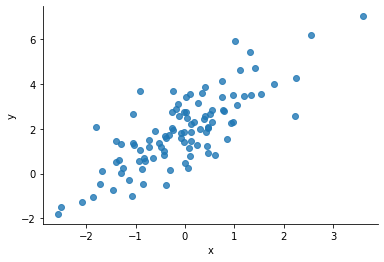

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x, y, fit_reg=False)
plt.xlabel("x")
plt.ylabel("y")
sns.despine();

In [4]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     166.9
Date:                Sat, 20 Feb 2021   Prob (F-statistic):           6.90e-23
Time:                        20:21:22   Log-Likelihood:                -141.82
No. Observations:                 100   AIC:                             287.6
Df Residuals:                      98   BIC:                             292.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9939      0.101     19.719      0.0

MLE provides as a **point estimate of the model parameters** (in this case, the intercept `const` and slope `x1`) and **confidence intervals** (based on the standard error). I always find the interpretation of such intervals, though, a bit tricky: The idea is that, **if we were to repeat the experiment** x times, the point estimates of the parameters would fall 95% of the times in this interval.

In Bayesian statistics, we are interested instead in the **uncertainty around the parameters, given a fixed set of data**. In other word, we want a **probability distribution** of the model parameters, after seeing the data (the posterior probability, see below). This is not something we can get from MLE!

Here is where Bayesians and Frequentists' views mostly differ: 
- Frequentists look at fixed estimated parameters in hypothetical repeated experiments;
- Bayesians look at the parameter distributions after a fixed set of data;

## Prior and posterior distributions

In Bayesian parameter estimation, we express most things in terms of **parameter distributions**.

First of all, we have **prior distributions**. As the name suggests, prior distributions express the uncertainty around a model's parameters **BEFORE** seeing the data. Why is this even important?

By "comparing" prior beliefs to new observations, we have a feeling of how surprising they are: 
- When a new observation (e.g., I see a white swan) matches my prior beliefs (e.g., most swans are white) I am strenghtening my prior beliefs: The more new observations (e.g., the more white swans I see), the stronger my prior beliefs become. 
- However, when a new observation (e.g., I see a black swan) does not match my prior beliefs, this should descrease the certainty of my prior beliefs: The more new non-matching observations I collect (e.g., the more black swans I see), the weaker my prior beliefs become. Crucially, the stronger the prior beliefs, the more non-matching observations I should collect in order to change them.

Therefore, from a Bayesian perspective, the uncertainty around a model's parameters **AFTER** seeing the data (aka the **posterior distributions**) has to include prior beliefs as well.

Prior beliefs are also important in all situations in which we need to constantly update the model parameters based on new, incoming information. For example, in adaptive experimental designs when we want to set a certain difficulty level so that each participants will reach e.g. 60% accuracy. Or if we are replicating an experiment with a new group of participants. In these cases, we want to integrate our prior beliefs with the new information to update our posterior beliefs.

If this sounds very intuitive to you, it is no coincidence, as there are different psychological theories that show similarities between Bayesian updating and different process of adaptation in the human brain! :)

## Bayes Theorem and likelihood functions

These principles are formalized into the [Bayes Theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem):
$$
P(A|B) = \frac{P(A) P(B|A)}{P(B)}
$$
where A and B are events and $P(B)$ is not 0.

In the case of parameter estimation:
$$
P(\theta|\textbf{D}) = \frac{P(\theta) P(\textbf{D} |\theta)}{P(\textbf{D})}
$$
where:

- $P(\theta|\textbf{D})$ is the posterior probability of the parameter set $\theta$ after observing the data $\textbf{D}$
- $P(\textbf{D} |\theta)$ is the likelihood of the data given $\theta$
- $P(\theta)$ is the prior probability of the parameter set $\theta$
- and $P(\textbf{D})$ is the probability of the data irrespective of $\theta$

While $P(\theta|\textbf{D})$ and $P(\textbf{D} |\theta)$ are conditional probabilities, $P(\theta)$ and $P(\textbf{D})$ are marginal probabilities.

For our purposes, we will only focus on priors and likelihood when specifying our models, and we will inspect posterior distributions to inspect the models fit to the data.

The likelihood function is something very specific of a certain model. Most things you have learned about likelihoods in the frequentist domain are also relevant here.

While "likelihood-free" Bayesian methods are possible (i.e., for models without a closed-form solution), we will only focus here on models of which we know their likelihood function.

## Posterior predictive distributions

When assessing the fit of a model, we are often interested in:
1. absolute model fit: how well could the model capture the patterns we observed in the data?
2. relative model fit: how well could the model capture the data-patterns compared to another model?
3. how well does the model generalizes to "new" data (out of the sample it was used to fit the model in the first place)?

**Posterior predictive distributions** are useful to reach all these goals.

Once we have obtained the posterior distribution $P(\theta|\textbf{D})$, we have an idea of which parameter values are more likely (given the observed data $\textbf{D}$). Therefore, if we sample $\theta$ values, we can generate different data sets that will tell us which data are likely under our new model.

For example, we estimate the average height of students in class A in a school, using a simple Gaussian distribution. We then:

1. want to assess how well our model captures the data. In case, for example, we know that there were a subset of very tall students in the class, what we can do is sample different mean values from the posterior distribution, and for each of them generate data using a Gaussian distribution with that mean. For each of these generated data sets, we calculate the .9 height quantile, so that we have a distribution of .9 height quantiles. At this point we can compare the generated data summary statistics to the one observed in the data the model was fit on. Since the Gaussian model only has 1 mean, this summary statistic will likely not match the one of the data. This is an example of bad absolute model fit.

2. now, we fit an alternative model, that assumes two means, one for the "tall students" sungroup, and one for everyone else. This model's posterior predictive distribution is more likely to match the observed data pattern. We can thus use this as evidence that this alternative model is better than the simple one-mean model.

3. now, we want to know how well this model generalizes to the data of students heights in class B of the same school. Instead of fitting the model again to the data in class B, we can calculate the average heigh and .9 height quantile in class B and use the posterior predictives of the previous models to compare it to them. What do you expect to observe?